In [1]:
#Install MiniSom Package
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-py3-none-any.whl size=8530 sha256=c2942da17b6be2e152aa6e4b7720b6abfb36746f357debd171908cb5946a6b81
  Stored in directory: c:\users\likhita\appdata\local\pip\cache\wheels\2a\0e\9e\6500009288a2a348561306008bd82dad4b47d7766966d92bac
Successfully built MiniSom


In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [4]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [5]:
#Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

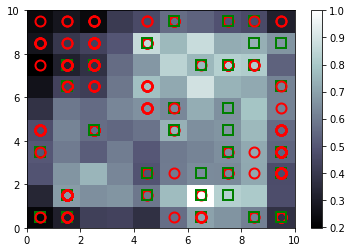

In [6]:
#Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [7]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [8]:
# Printing the Fraunch Clients
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15739548
15699839
15705918
15706762
15672894
15783883
15756538
15651868
15801473
15728523
15716082
15651460
15675926
15672637
15794204
15734008
15757434
15769548
15742009
15752344
15736533
15673907
15737909
15660528
15779207
15611409
15711299
15609987
15752578
15666096
15609758
15636454
15615296
15618258
15805261
15715750
15621546
15789201
15723884
15636478
15689781
15735837
15627699
15778290
15585192
15591552
15701081
15622729
15671582
15611318
15649183
15751137
15641715
15664083
15690898
15704315
15622507
15640521
15591248
15800049
15598266
15593694
15785367
15659031
15801817
15642098
15725002
15707681
15632669
15701738
15690169
